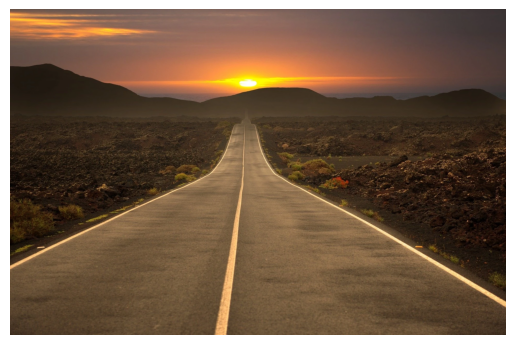

In [1]:
# 직선 검출
# 허프 선 변환 알고리즘 : 이미지 내의 어떤 점이라도 선 집합의 일부일 수 있다는 가정하에 직선의 방정식을 이용해 직선을 검출하는 방식
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("d:/data/images/road.jpg")
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.axis("off")
plt.show()

In [2]:
import numpy as np
dst = img.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# 임계값 5000, 1500, 주요한 가장자리만 남김
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
#cv2.HoughLines(이미지, 거리, 각도, 임계값, 거리 약수, 각도 약수, 최소 각도, 최대 각도)
lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100,
                       stn = 200, min_theta = 0, max_theta = np.pi)
for i in lines:
    rho, theta = i[0][0], i[0][1]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a*rho, b*rho
    scale = src.shape[0] + src.shape[1]
    x1 = int(x0 + scale * -b)
    y1 = int(y0 + scale * a)
    x2 = int(x0 - scale * -b)
    y2 = int(y0 - scale * a)
    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.circle(dst, (int(x0), int(y0)), 3, (255, 0, 0), 5, cv2.FILLED)
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

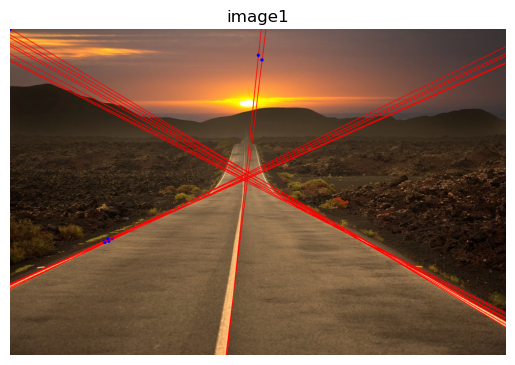

In [3]:
src = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('image1')
plt.axis("off")
plt.show()

In [4]:
# Progressive Probabilistic Hough Transform, 점진성 확률적 허프 변환
# 모든 좌표가 아닌 임의의 좌표만을 대상으로 계산하는 방식
dst = img.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90,
                        minLineLength = 10, maxLineGap = 100)
for i in lines:
    cv2.line(dst, (int(i[0][0]), int(i[0][1])), 
             (int(i[0][2]), int(i[0][3])), 
             (0, 0, 255), 2)

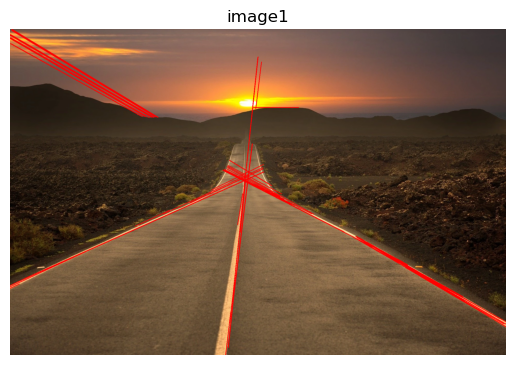

In [5]:
src = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('image1')
plt.axis("off")
plt.show()